In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
paths = {
    "db_ic15": {
        "ic15": "../../results/db_ic15_results/db_ic15/db_ic15infer_time.json",
        "tt": "../../results/db_tt_results/db_ic15/infer_time.json"
    },
    "db_tt": {
        "ic15": "../../results/db_ic15_results/db_tt/db_ttinfer_time.json",
        "tt": "../../results/db_tt_results/db_tt/infer_time.json"
    },
    "textfusenet_ic15": {
        "ic15": "../../results/textfusenet_ic15_results/textfusenet_ic15/infer_time.json",
        "tt": "../../results/textfusenet_tt_results/textfusenet_ic15/infer_time.json"
    },
    "textfusenet_tt": {
        "ic15": "../../results/textfusenet_ic15_results/textfusenet_tt/infer_time.json",
        "tt": "../../results/textfusenet_tt_results/textfusenet_tt/infer_time.json"
    },
    
}

In [6]:
inference_times = []
for model, datasets in paths.items():
    for dataset, json_path in datasets.items():
        if dataset == 'ic15':
            with open(json_path) as f:
                data = json.load(f)
            print(model, dataset, len(data['prediction']), len(data['recognition']))
            row = {
                'model': model,
                'dataset': dataset,
                'detection_time': data['prediction'],
                'recognition_time': data['recognition'],
                'total_time': [t1 + t2 for t1, t2 in zip(data['prediction'], data['recognition'])]
            }
            inference_times.append(row)

db_ic15 ic15 500 500
db_tt ic15 500 500
textfusenet_ic15 ic15 500 500
textfusenet_tt ic15 500 500


In [14]:
inference_times[0].keys()

dict_keys(['model', 'dataset', 'detection_time', 'recognition_time', 'total_time'])

In [51]:
import numpy as np


detection_time
db_ic15: 0.282
db_tt: 0.279
textfusenet_ic15: 0.525
textfusenet_tt: 0.518

recognition_time
db_ic15: 0.963
db_tt: 0.744
textfusenet_ic15: 0.745
textfusenet_tt: 0.465

total_time
db_ic15: 1.246
db_tt: 1.022
textfusenet_ic15: 1.27
textfusenet_tt: 0.983


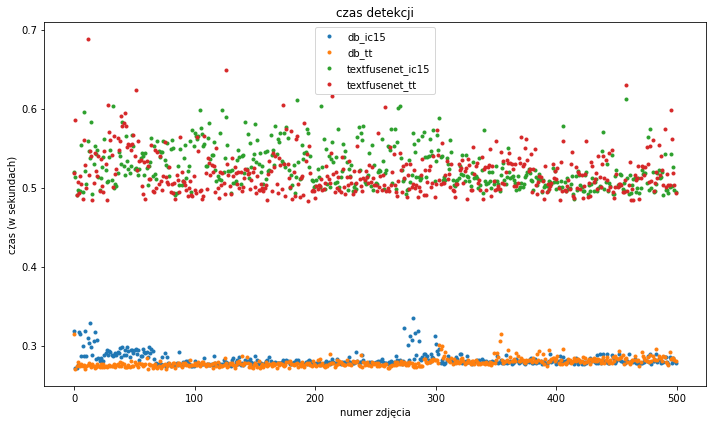

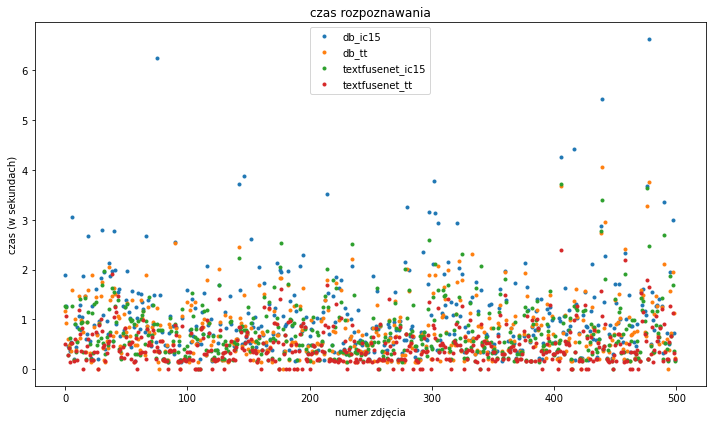

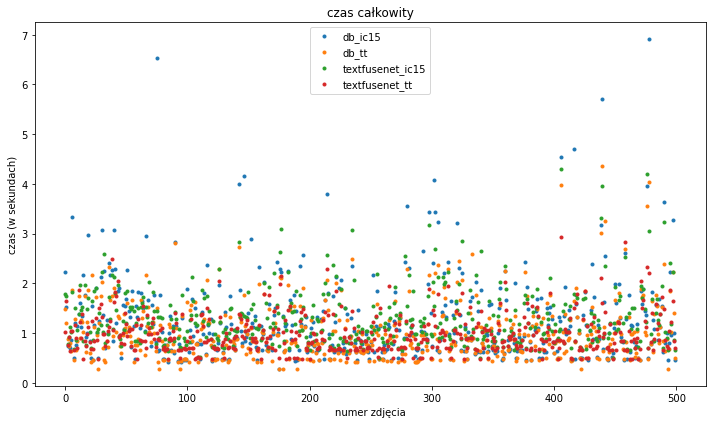

In [56]:


for category, title in zip(['detection_time', 'recognition_time', 'total_time'],
                 ['czas detekcji', 'czas rozpoznawania', 'czas całkowity']):
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.set_title(title)
#     ax.set_ylim(ymin=-0.1)

    print()
    print(category)
    for stats in inference_times:
        
        ax.plot(stats[category], label=stats['model'], marker='.', linestyle='None')
        ax.legend()
        ax.set_xlabel('numer zdjęcia')
        ax.set_ylabel('czas (w sekundach)')
        plt.tight_layout()
        fig.savefig(f"time_plots/{category}.png")
        print(f"{stats['model']}: {round(np.mean(stats[category]), 3)}")


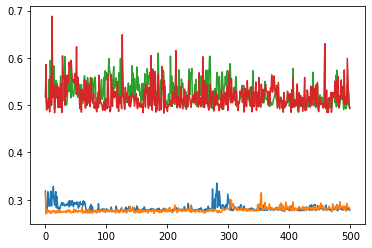

In [42]:

# plt.plot(stats['total_time'])

In [18]:
df[df.dataset=='ic15']

,model,dataset,detection_times,recognition_times
0,db_ic15,ic15,"[0.31844139099121094, 0.27210259437561035, 0.2...","[1.9009954929351807, 1.261422872543335, 0.4672..."
2,db_tt,ic15,"[0.31467676162719727, 0.269977331161499, 0.273...","[1.1660771369934082, 0.9322688579559326, 0.605..."
4,textfusenet_ic15,ic15,"[0.5193655490875244, 0.5135247707366943, 0.490...","[1.275172233581543, 1.2395458221435547, 0.2807..."
6,textfusenet_tt,ic15,"[0.5183546543121338, 0.5858361721038818, 0.490...","[0.5025784969329834, 1.0666661262512207, 0.278..."
